# TF-IDF & WORD EMBEDDING, KLASIFIKASI SVM & NAIVE BAYES

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/semester 5/ppw/hasil-pre-pro_isi_beritaa.csv')
print(df.head())

                                                 isi kategori  \
0                                  Content Not Found  Politik   
1  Jakarta - Menteri Sosial Saifullah Yusuf (Gus ...  Politik   
2  Jakarta - Menteri Dalam Negeri Muhammad Tito K...  Politik   
3  Polisi mengungkap alasan para tersangka pencul...  Politik   
4  Jakarta - Kementerian Ketenagakerjaan (Kemnake...  Politik   

                                       isi(stopword)  \
0                                  content not found   
1  jakarta - menteri sosial saifullah yusuf (gus ...   
2  jakarta - menteri negeri muhammad tito karnavi...   
3  polisi mengungkap alasan tersangka penculikan ...   
4  jakarta - kementerian ketenagakerjaan (kemnake...   

                                           isi_clean  \
0                                  content not found   
1  jakarta menteri sosial saifullah yusuf gus ipu...   
2  jakarta menteri negeri muhammad tito karnavian...   
3  polisi mengungkap alasan tersangka penculikan

## TF-IDF

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import ast

print("Sample of 'isi_tokens' column:")
print(df['isi_tokens'].head())

# Konversi string list ke Python list
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []  # kalo gagal, return list kosong

df['isi_tokens_list'] = df['isi_tokens'].apply(safe_literal_eval)

# Gabungkan token jadi string
df['tokens_joined'] = df['isi_tokens_list'].apply(lambda x: ' '.join(x))

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform
tfidf_matrix = tfidf.fit_transform(df['tokens_joined'])

# Buat DataFrame hasil TF-IDF
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out(),
    index=df.index
)

# ---- TAMPILKAN HASIL ----
print("Shape TF-IDF:", tfidf_matrix.shape)  # (jumlah_dokumen, jumlah_kata_unik)

# Tampilkan 5 baris pertama (biar gak terlalu panjang)
print("\nTF-IDF sample (5 dokumen pertama):")
print(tfidf_df.head())

Sample of 'isi_tokens' column:
0                          ['content', 'not', 'found']
1    ['jakarta', 'menteri', 'sosial', 'saifullah', ...
2    ['jakarta', 'menteri', 'negeri', 'muhammad', '...
3    ['polisi', 'ungkap', 'alas', 'sangka', 'culi',...
4    ['jakarta', 'menteri', 'ketenagakerjaan', 'kem...
Name: isi_tokens, dtype: object
Shape TF-IDF: (200, 6304)

TF-IDF sample (5 dokumen pertama):
   0011  010  014  0147  0193  0258  0379  0381   04  0420  ...  zarco  \
0   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0  ...    0.0   
1   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0  ...    0.0   
2   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0  ...    0.0   
3   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0  ...    0.0   
4   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0  0.0   0.0  ...    0.0   

   zaulia  zefanya  zendegi  zhehuang  zhou  zinc  zita  zufra  zulkifli  
0     0.0      0.0      0.0       0.0   0.0   0.0   0.0    0.0       0.0  
1    

In [25]:
!pip install gensim

## Word Embedding

In [26]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np

# ====== Contoh Dataframe kamu ======
# misal isi_tokens berisi list kata
df = pd.DataFrame({
    "isi_tokens": [
        ["presiden", "jokowi", "bertemu", "dengan", "para", "menteri"],
        ["indonesia", "berhasil", "meraih", "medali", "emas", "di", "bulu", "tangkis"],
        ["jakarta", "diguyur", "hujan", "deras", "hari", "ini"]
    ],
    "dokumen_asli": [
        "presiden jokowi bertemu dengan para menteri",
        "indonesia berhasil meraih medali emas di bulu tangkis",
        "jakarta diguyur hujan deras hari ini"
    ]
})

# ====== Latih Word2Vec ======
model = Word2Vec(
    sentences=df["isi_tokens"],
    vector_size=100,  # banyak dimensi
    window=5,
    min_count=1,
    workers=4
)

# ====== Buat embedding per dokumen ======
def doc_vector(tokens, model):
    vectors = []
    for token in tokens:
        if token in model.wv:
            vectors.append(model.wv[token])
    if len(vectors) == 0:
        return np.zeros(model.vector_size)  # kalau token ga ada
    else:
        return np.mean(vectors, axis=0)  # rata-rata vektor kata

# Hitung embedding semua dokumen
doc_embeddings = df["isi_tokens"].apply(lambda x: doc_vector(x, model))

# Ubah ke dataframe (dim_0 ... dim_99)
embeddings_df = pd.DataFrame(doc_embeddings.tolist(), columns=[f"dim_{i}" for i in range(model.vector_size)])

# Tambahkan kolom dokumen asli
final_df = pd.concat([embeddings_df, df["dokumen_asli"]], axis=1)

print("Contoh Word Embedding (Dokumen jadi Vektor) ===")
print(final_df.head())

Contoh Word Embedding (Dokumen jadi Vektor) ===
      dim_0     dim_1     dim_2     dim_3     dim_4     dim_5     dim_6  \
0 -0.001709  0.002798 -0.002383 -0.001359 -0.000433  0.002564  0.003340   
1  0.000818  0.002231  0.002177  0.000142  0.000203 -0.002498  0.000100   
2 -0.000585 -0.000734  0.002248  0.002910  0.002292 -0.004570  0.001681   

      dim_7     dim_8     dim_9  ...    dim_91    dim_92    dim_93    dim_94  \
0  0.001860 -0.002417 -0.001283  ...  0.001770 -0.001113 -0.000930  0.003377   
1  0.001731 -0.001080 -0.004299  ...  0.001316  0.000192  0.002393  0.002333   
2  0.006360 -0.003605 -0.002025  ...  0.001037  0.003283 -0.000640  0.000921   

     dim_95    dim_96    dim_97    dim_98    dim_99  \
0 -0.001138  0.002677 -0.001539  0.002210 -0.000235   
1 -0.001921  0.001321  0.001385  0.001576  0.001295   
2  0.005349 -0.000753 -0.001191 -0.000312  0.002525   

                                        dokumen_asli  
0        presiden jokowi bertemu dengan para menteri  

In [27]:
# Cek arsitektur model
if model.sg == 0:
    print("Model menggunakan CBOW ✅")
else:
    print("Belum menggunakan CBOW✅")

Model menggunakan CBOW ✅


## Visualisasi

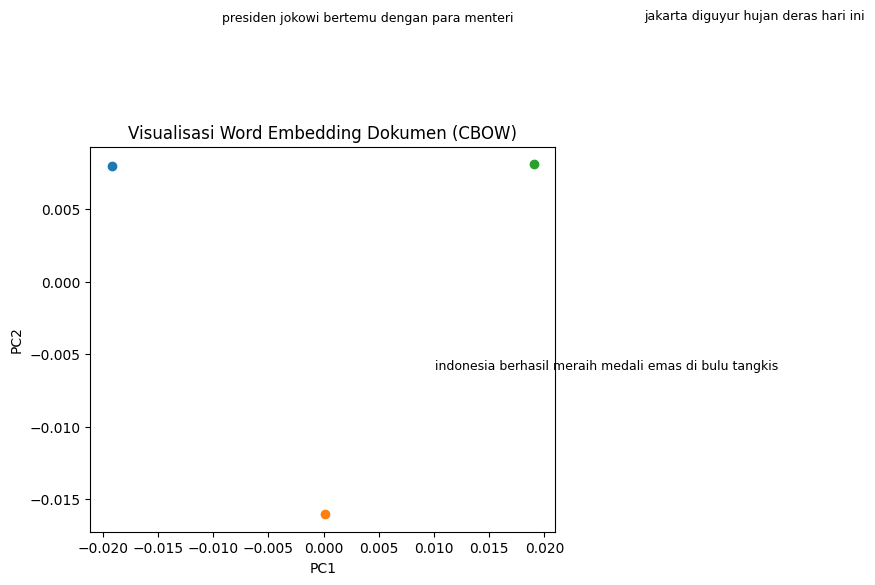

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA ke 2 dimensi
pca = PCA(n_components=2)
doc_embeddings_2d = pca.fit_transform(doc_embeddings.tolist())

# Buat plot
plt.figure(figsize=(6,5))
for i, txt in enumerate(df["dokumen_asli"]):
    x, y = doc_embeddings_2d[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, txt, fontsize=9)
plt.title("Visualisasi Word Embedding Dokumen (CBOW)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [32]:
df['label'] = df['kategori']  # "Politik" atau "Olahraga"

In [33]:
from sklearn.model_selection import train_test_split

X = doc_embeddings.tolist()  # hasil embedding Word2Vec
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Perbandingan TF-IDF dan Word Emedding mengunakan SVM dan Naive Bayes

In [40]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score

# ===== Contoh DataFrame =====
# Modified to include multiple categories
df = pd.DataFrame({
    "isi_tokens": [
        ['content', 'not', 'found'],
        ['jakarta', 'menteri', 'sosial', 'saifullah', 'yusuf', 'gus', 'ipu'],
        ['jakarta', 'menteri', 'negeri', 'muhammad', 'tito', 'karnavian'],
        ['polisi', 'ungkap', 'alas', 'sangka', 'culi'],
        ['jakarta', 'menteri', 'ketenagakerjaan', 'kemnaker', 'catat'],
        ['tim', 'nasional', 'indonesia', 'raih', 'emas', 'seagames'],
        ['pertandingan', 'sepakbola', 'liga', 'italia', 'seru'],
        ['harga', 'minyak', 'dunia', 'naik', 'drastis']
    ],
    "kategori": ['politik', 'politik', 'politik', 'politik', 'politik', 'olahraga', 'olahraga', 'bisnis']
})

# ===== Word2Vec Embedding =====
w2v_model = Word2Vec(sentences=df['isi_tokens'], vector_size=50, window=3, min_count=1, workers=4)

def doc_vector(tokens, model):
    vectors = [model.wv[t] for t in tokens if t in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_w2v = np.array([doc_vector(tokens, w2v_model) for tokens in df['isi_tokens']])
y = df['kategori']

# ===== Cross-validation SVM (Word2Vec) =====
svm_model = SVC()
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)  # 2 fold karena dataset kecil
scores = cross_val_score(svm_model, X_w2v, y, cv=cv)
print("Average SVM accuracy (Word2Vec):", scores.mean())

# ===== TF-IDF =====
df['isi_string'] = df['isi_tokens'].apply(lambda x: ' '.join(x))
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['isi_string'])

# ===== Cross-validation Naive Bayes (TF-IDF) =====
nb_model = MultinomialNB()
scores_nb = cross_val_score(nb_model, X_tfidf, y, cv=cv)
print("Average Naive Bayes accuracy (TF-IDF):", scores_nb.mean())

Average SVM accuracy (Word2Vec): 0.625
Average Naive Bayes accuracy (TF-IDF): 0.625


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
